In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pickle
import os
import sys

In [10]:
sys.path.append('C:\\Users\\Ortva\\PycharmProjects\\bsc-thesis\\src\\')

In [50]:
n = 10 #number of subjects

notfound = {}
start = []
end = []

for i in range(n):
    try:
        events = pd.read_csv(f"events/sub-{(i+1):04d}/func/sub-{(i+1):04d}_task-faces_acq-mb3_events.tsv",sep='\t',header=0)
    
    except FileNotFoundError: 
        notfound[i] = f"{(i+1):04d}"
        continue
    
    start.append(np.array(events.onset*4/3))
    end.append(np.array((events.onset+2)*4/3))

print(f"files not found {[*notfound.values()]}")
print(f"Number of files not found: {len(notfound)}")
print(f"Number of subjects {len(start)}")

files not found []
Number of files not found: 0
Number of subjects 10


In [29]:
start[0]

array([  6.66706667,  16.00173333,  25.3364    ,  34.67773333,
        44.0124    ,  53.34706667,  62.68173333,  72.0164    ,
        81.35106667,  90.68573333, 100.0204    , 109.35506667,
       118.68973333, 128.0244    , 137.35906667, 146.69373333,
       156.0284    , 165.36306667, 174.69773333, 184.0324    ,
       193.36706667, 202.70173333, 212.0364    , 221.37106667,
       230.70573333, 240.0404    , 249.37506667, 258.70973333,
       268.0444    , 277.37906667, 286.71373333, 296.0484    ,
       305.38306667])

<IPython.core.display.Javascript object>


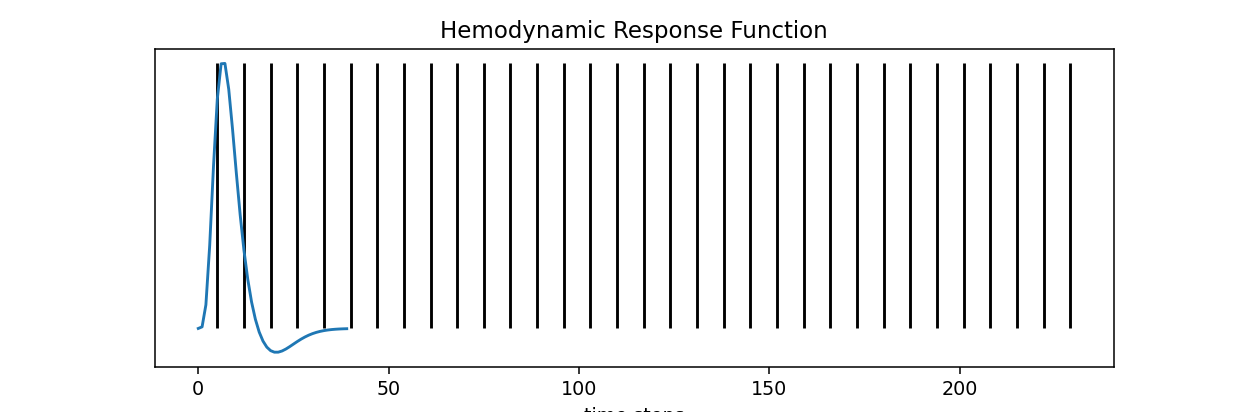

In [45]:
plt.figure(figsize=(9,3))
plt.yticks([])
plt.title("Starttime of tasks for subject 0001")
plt.xlabel("time (s)")
plt.vlines(start[0]*3/4, 0, 1, linestyles ="solid", colors ="k")
plt.show()

In [46]:
N = len(start)
Labels = np.zeros([N,330])

for i in range(N):
    for j in range(len(start[i])):
        
        idx = math.ceil(start[i][j])
        
        while idx < end[i][j]:
            Labels[i,idx] = 1
            idx += 1

<IPython.core.display.Javascript object>


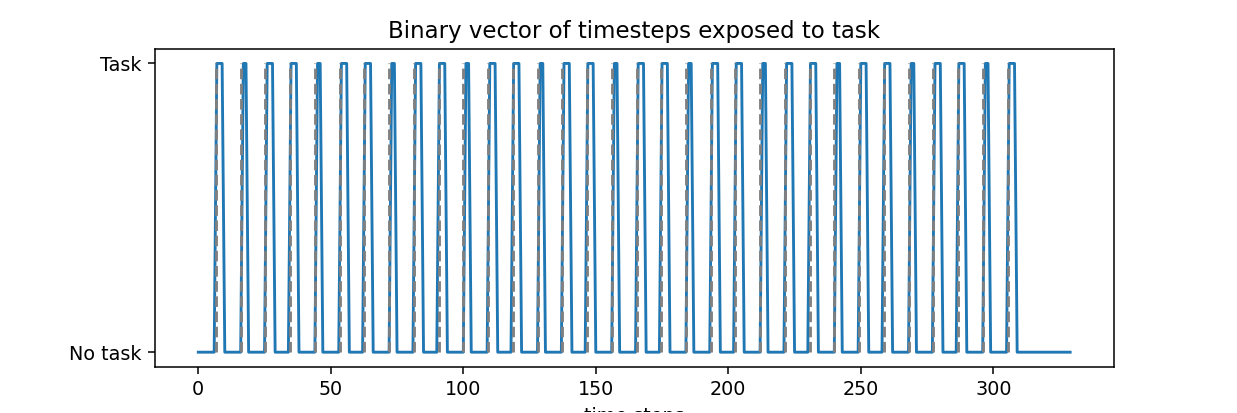

In [47]:
plt.figure(figsize=(9,3))
plt.plot(Labels[0])
plt.yticks([0,1],["No task","Task"])
plt.title("Binary vector of timesteps exposed to task")
plt.xlabel("time steps")
plt.vlines(start[0], 0, 1, linestyles ="dashed", colors ="gray")

In [34]:
print((len(start[0])*2*4/3)/330)
print(np.mean(Labels[0]))

0.26666666666666666
0.26666666666666666


In [48]:
import hrf_estimation as he
print('You are running hrf_estimation version %s' % he.__version__)

You are running hrf_estimation version 1.1


In [49]:
from scipy import signal
plt.close()
xx = np.linspace(0, 30,num=int(30*4/3))
hrf = he.hrf.spmt(xx)
plt.plot(hrf)
plt.xlabel("time steps")
plt.title("Hemodynamic Response Function")
plt.show()

LabelsC = [np.convolve(Labels[i],hrf, mode = "full")[0:330] for i in range(Labels.shape[0])]

LabelsC = np.array([(LabelsC[i] - LabelsC[i].mean())/(LabelsC[i].max())+1/2 for i in range(Labels.shape[0])])

<IPython.core.display.Javascript object>


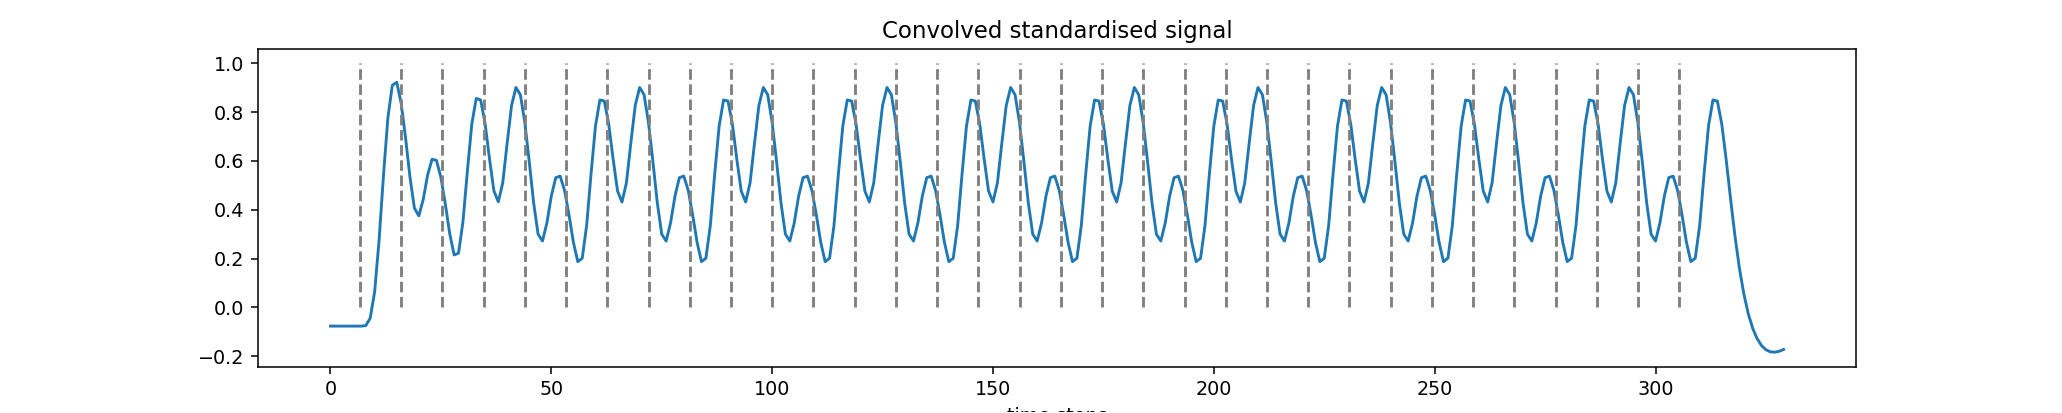

In [44]:
plt.figure(figsize=(15,3))
plt.plot(LabelsC[0][0:330])
plt.title(f"Convolved standardised signal")
plt.xlabel("time steps")
plt.vlines(start[0], 0, 1, linestyles ="dashed", colors ="gray")
plt.show()

In [19]:
print(LabelsC.shape)
y = np.array(LabelsC).flatten()

(10, 330)


In [20]:
#export to R
pd.DataFrame(y).to_csv('y_K=10.csv')